# Video Streams
## Computer Vision and Image Processing - Lab Session 5
### Prof: Luigi Di Stefano, luigi.distefano@unibo.it
### Tutor: Pierluigi Zama Ramirez, pierluigi.zama@unibo.it - Riccardo Spezialetti, riccardo.spezialetti@unibo.it

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Import additional library to properply play videos on jupyter notebook
from IPython.display import clear_output

A video is a temporal sequence of images, namely **Frames**.

<img src="LabSession5Images/Eadward-Muybridge-Horse-in-Motion.jpg" width="512">

The number of frames in 1 second of video is called **frame rate**

In a video we can elaborate each frame separately with processing algorithms or we can elaborate only keyframe of the original video and the missing ones are reconstructed by interpolation.

## Load a Video from File

To load a video in OpenCV you need to create a VideoCapture object. Its argument can be either the device index or the name of a video file.
A device index is just the number to specify which camera. Normally one camera will be connected (as in my case). So I simply pass 0 (or -1).
You can select the second camera by passing 1 and so on. After that, you can capture frame-by-frame. But at the end, don't forget to release the capture.

Let us now try to load a video from a file:

In [3]:
cap = cv2.VideoCapture('LabSession5Images/video.avi')

<VideoCapture 0x7f5375b9b250>

Sometimes, cap may not have initialized the capture. In that case, this code shows an error. You can check whether it is initialized or not by the method cap.isOpened(). If it is True, OK. Otherwise open it using cap.open().

In case the capture is open we can get a frame of the capture in the following way:

In [4]:
if cap.isOpened():
    ret, frame = cap.read()

print(ret, frame.shape)

True (180, 320, 3)


Where _ret_ is a boolean variable which is True if we read the frame correctly and _frame_ is an image. Let us visualize the captured frame:

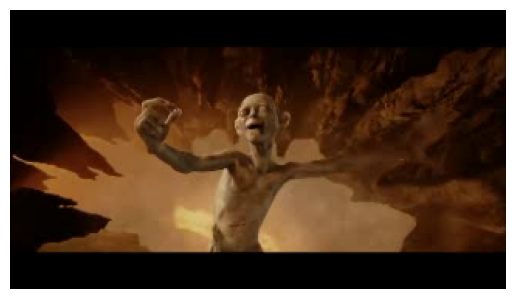

In [5]:
if ret and not frame is None:
    # Disabling matplotlib axis for better visualization
    plt.axis('off')
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.show()

You can also access some of the features of this video using cap.get(propId) method where propId is a number from 0 to 18. Each number denotes a property of the video (if it is applicable to that video). Some of these values can be modified using cap.set(propId, value).

For example to get the width and height of the frame:

In [6]:
print("Width: " , cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print("Height: ", cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

Width:  320.0
Height:  180.0


My video is of resolution 320x180.

To release the capture stream:

In [7]:
cap.release()

If we want to play our video in **jupyter notebook** we can do the following (a bit slow because of jupyter not ideal for playing videos):

In [8]:
# Put the code in try-except statements catch the keyboard exception and release the camera device and 
# continue with the rest of code.
def play_video(video_path):
    cap = cv2.VideoCapture(video_path)
    # Try-except statement to manage exceptions
    try:
        while(True):
            # Capture frame
            ret, frame = cap.read()
            if not ret or frame is None:
                # Release the Video if ret is false
                cap.release()
                print("Released Video Resource because ret=False")
                # Break exit the while loops
                break
            
            # Display the frame
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            plt.axis('off')
            plt.title("Input Stream")
            plt.imshow(frame)
            plt.show()
            
            # Clear cell output when new frame is available
            clear_output(wait=True)
    except KeyboardInterrupt:
        # If we press stop (jupyter GUI) release the video
        cap.release()
        print("Released Video Resource")

play_video('LabSession5Images/video.avi')

Released Video Resource


__N.B__: It can happen that we want to play a video from a non-jupyter enviroment. In that case we can modify the above code as follows:

```python
def play_video(video_path):
    cap = cv2.VideoCapture(video_path)
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret or frame is None:
            # Release the Video if ret is false
            cap.release()
            print("Released Video Resource")
            break

        # !!! DISPLAYING CHANGE RESPECT TO JUPYTER VERSION !!!
        # Displaying with OpenCV (Not working in Jupyter)
        cv2.imshow('frame', frame)
        # Stop playing when entered 'q' from keyboard
        if cv.waitKey(1) == ord('q'):
            break
    cap.release()
    cv.destroyAllWindows()
```

## Load a Video from a Camera (Only if Camera Available)
If we want to load a video from a camera we can open our video capture giving a device id as input.

In [19]:
# Working only if a camera is available.
cap = cv2.VideoCapture(0)

print("Width: " , cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print("Height: ", cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

Width:  0.0
Height:  0.0


VIDEOIO ERROR: V4L: can't open camera by index 0


Resolution is 640x480 by default. We can change it using cap.set (not all resolutions are possible depending on the camera driver):

In [20]:
ret = cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)

Now frames have the desired resolution:

In [21]:
if cap.isOpened():
    ret, frame = cap.read()

print(ret, frame.shape)

cap.release()

False (180, 320, 3)


Let us try to reproduce our webcam stream:

In [22]:
play_video(0)

Released Video Resource because ret=False


VIDEOIO ERROR: V4L: can't open camera by index 0


## Saving a Video

To save a video on a file we need to create a VideoWriter object specifying:
* **Filename** (eg: output.avi)
* **FourCC code**: 4-byte code used to specify the video codec. The list of available codes can be found in fourcc.org. It is platform dependent. In Windows DIVX is the preferred choice while on linux we have several standards such as DIVX, XVID, X264 etc..
* **FPS**: number of frames per second
* **Frame size**
* Flag **isColor**: If it is True, the encoder expect color frame, otherwise it works with grayscale frame.

Let us try to load and save a video with each frame flipped along vertical axis. Load the original video:

In [23]:
# Loading Video
cap = cv2.VideoCapture("LabSession5Images/video.avi")

# Getting original video params
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

Initialize the VideoWriter based on the parameters of the original video:

In [24]:
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
# N.B. we need to specify the correct width and height of the frames otherwise we will not be able to reproduce the video
out = cv2.VideoWriter('output.avi', fourcc, fps, (w,  h))

Flip and save frame by frame the video:

In [25]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret or frame is None:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = np.flip(frame, axis=0)
    # write the flipped frame
    out.write(frame)

Can't receive frame (stream end?). Exiting ...


Release the resources:

In [26]:
# Release everything if job is finished
cap.release()
out.release()

Let us visualize the flipped video:

In [27]:
play_video('output.avi')

Released Video Resource


## Change Detection Algorithms

Change Detection: detection of “meaningful” changes occurring in a scene by processing of images captured at different time instants.
* Input: two (at least!) or more images of the monitored scene.
* Output: binary image, called "change mask“: each pixel is assigned one between two values (labels) c, u ("changed",  unchanged"): c if meaningful changes occur at the pixel, u otherwise (commonly, c = 255, u = 0 → white/ black).

<img src="LabSession5Images/ChangeDetection.png" width="512">

Example of Applications are Traffic monitoring, Video compression, Security etc ..

The following Change Detection Algorithms we will talk later are based on the following **working assumptions**:
* **Static camera**
* **High frame rate**

### Distance functions between two images

We define as $F_t(i,j) \in R^2$ our grayscale frame and as $F_t(i,j) \in R^n$ our colored frame where $n$ are the number of channels, $i,j$ are the pixel coordinates and $t$ the temporal position in the video sequence. We define $d(F_t(i,j), F_{t-k}(i,j))$ as a distance function between two different frames where $k=0,1..,t$.

Typical distance functions are the Holder norms of the difference vector. Given a vector $v\in R^n$ and a norm $p$ they are defined as follows:

$||v||_p =\sqrt[p]{\sum_{i=1}^n{|v_i|^p}}$

With two frames with $n$ channels $F_t(i,j) = [f_1^t(i,j),…, f_n^t(i,j)]$ and $F_k(i,j) = [f_1^k(i,j),…, f_n^k(i,j)]$ the norms of the difference are defined as follows:

$||F_t(i,j) - F_k(i,j)||_p = \sqrt[p]{|f_1^t(i,j) - f_1^k(i,j)|^p  + ... + |f_n^t(i,j) - f_n^k(i,j)|^p}$

Most used distance functions are:

* Manhattan distance:  $L_1(i,j)=||F_t(i,j) - F_k(i,j)||_1 = \sum_{i=1}^n{|f_i^t(i,j) - f_i^k(i,j)|}$
* Euclidean distance: $L_2(i,j)=||F_t(i,j) - F_k(i,j)||_2 = \sqrt{\sum_{i=1}^n{|f_i^t(i,j) - f_i^k(i,j)|^2}}$
* Maximum distance: $L_{\infty}(i,j)=||F_t(i,j) - F_k(i,j)||_{\infty} = max_i(|f_i^t(i,j) - f_i^k(i,j)|), i=1..n$ 

In case of colored images we usually have $n=3$ (the number of channels R,G,B).

In case of grayscale image with $n=1$ the norms becomes simply the absolute value of the pixel-wise difference $|F_t(i,j) - F_k(i,j)|$.


###  Two Frame Difference

A generic two frame difference algorithm is defined in the following way:

$C(i,j) = \begin{cases} 255, & if - d(F_t(i,j), F_{t-l}(i,j))>T \\ 0, & otherwise \end{cases}$

Example in case of grayscale image:

<img src="LabSession5Images/2FD.png" width="768">

Example in case of colored image and $L_{\infty}$:

<img src="LabSession5Images/2FD_rgb.png" width="768">

### Three Frame Difference

The Three Frame Difference is a simple extension of the Two Frame Difference. Given three frames $F_t(i,j)$, $F_{t-1}(i,j)$, $F_{t-2}(i,j)$ we perform first the two-frame differences between frames $t$ and $t-1$ and between frames $t-1$ and $t-2$. Finally, we compute the intersection (binary AND) between the two obtained change masks.

$C(i,j) = \begin{cases} 255, & {if -} (d(F_t(i,j), F_{t-l}(i,j))>T) \wedge (d(F_{t-1}(i,j), F_{t-2}(i,j))>T) \\ 0, & otherwise \end{cases}$


Example in case of colored image:

<img src="LabSession5Images/3FD.png" width="768">
 

### Background Subtraction

Very similar to the two-frame difference: the current frame is compared with a “model” (e.g. an image) of the background of the monitored scene (instead of the previous frame). Defined the background image as $B_t(i,j)$ we compute a general Background Subtraction algorithm in the following way:

$C(i,j) = \begin{cases} 255, & {if -} d(F_t(i,j), B_t(i,j))>T \\ 0, & otherwise \end{cases}$

Example with grayscale images:

<img src="LabSession5Images/BGS.png" width="768">

Example with colored images:

<img src="LabSession5Images/BGS_rgb.png" width="768">